In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_42180/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read results
co_kriging_input = pd.read_csv(
    "../cokriging/exp_co_kriging_input.csv", index_col=0)
co_kriging_output = pd.read_csv(
    "../cokriging/exp_co_kriging_output.csv", index_col=0)
# return back to original directory
# merge input and output
co_kriging_results = pd.merge(
    co_kriging_input, co_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
co_kriging_results["normalized_mae"] = co_kriging_results["normalized_mae"].abs()
co_kriging_results["normalized_rmse"] = co_kriging_results["normalized_rmse"].abs()

# read results for hk
hk_input = pd.read_csv("../hk/exp_hk_input.csv", index_col=0)
hk_output = pd.read_csv("../hk/exp_hk_output.csv", index_col=0)
# merge input and output
hk_results = pd.merge(hk_input, hk_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
hk_results["normalized_mae"] = hk_results["normalized_mae"].abs()
hk_results["normalized_rmse"] = hk_results["normalized_rmse"].abs()


# read results for mf scaled
mf_scaled_input = pd.read_csv(
    "../mf_scaled/exp_mf_scale_input.csv", index_col=0)
mf_scaled_output = pd.read_csv(
    "../mf_scaled/exp_mf_scale_output.csv", index_col=0)
# merge input and output
mf_scaled_results = pd.merge(
    mf_scaled_input, mf_scaled_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_scaled_results["normalized_mae"] = mf_scaled_results["normalized_mae"].abs()
mf_scaled_results["normalized_rmse"] = mf_scaled_results["normalized_rmse"].abs()


# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()

# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()

In [3]:
mf_rbf_kriging_results

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,mf_rbf,2,25,mf_Bohachevsky,1,finished,1.237338,0.421419,0.575696,0.371166
1,mf_rbf,4,25,mf_Bohachevsky,1,finished,0.862951,0.167717,0.932795,0.404447
2,mf_rbf,6,25,mf_Bohachevsky,1,finished,0.789877,0.145985,0.949082,0.358353
3,mf_rbf,8,25,mf_Bohachevsky,1,finished,0.393568,0.062814,0.990573,0.649109
4,mf_rbf,10,25,mf_Bohachevsky,1,finished,0.873521,0.177527,0.924703,0.820354
...,...,...,...,...,...,...,...,...,...,...
9995,mf_rbf,12,120,mf_Sixhump,5,finished,0.052736,0.007675,0.999969,1.185506
9996,mf_rbf,14,120,mf_Sixhump,5,finished,0.061561,0.012082,0.999922,1.016765
9997,mf_rbf,16,120,mf_Sixhump,5,finished,0.050383,0.007706,0.999968,1.625907
9998,mf_rbf,18,120,mf_Sixhump,5,finished,0.053021,0.009729,0.999950,1.788224


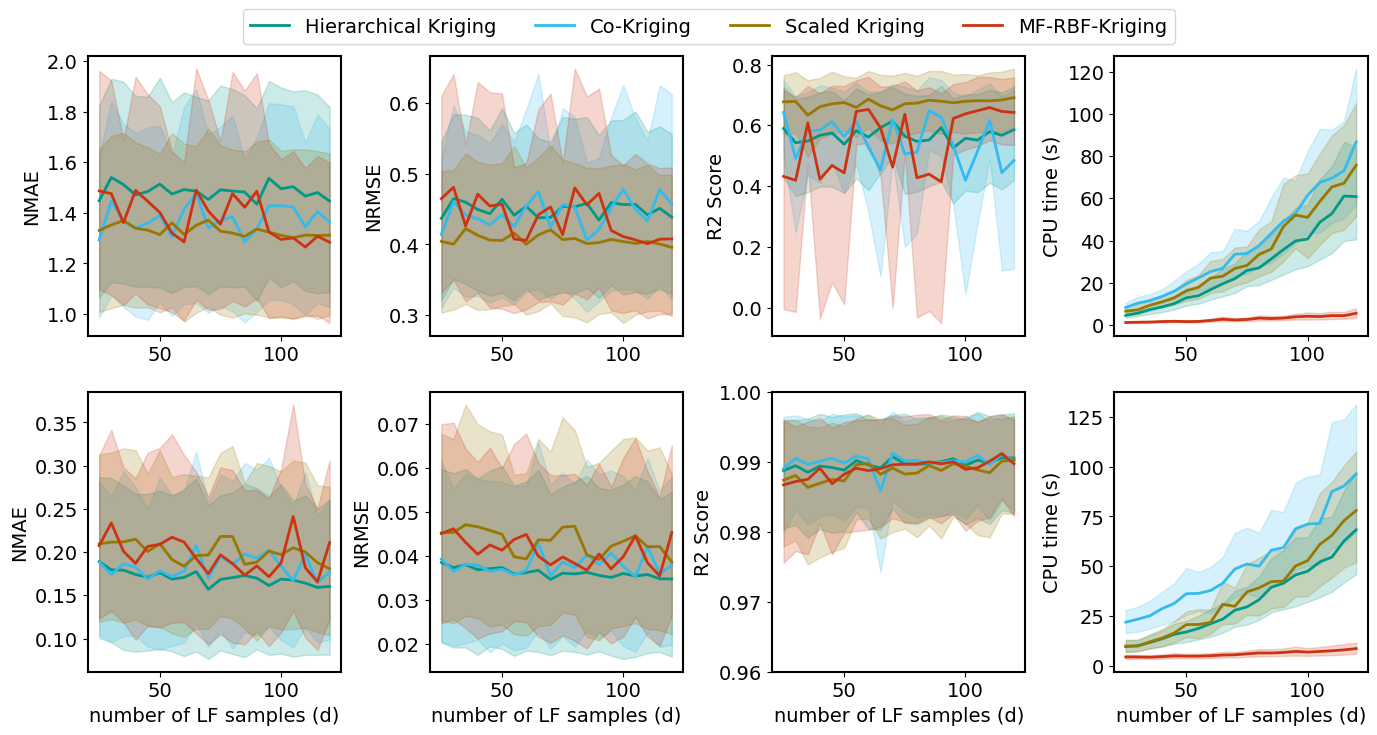

In [8]:
# number of hf samples
num_hf_plot_high = 20

# get the results for 120 samples
hk_results_plot_high = hk_results[hk_results["num_hf"] == num_hf_plot_high]
ck_results_plot_high = co_kriging_results[
    co_kriging_results["num_hf"] == num_hf_plot_high
]
scaled_results_plot_high = mf_scaled_results[
    mf_scaled_results["num_hf"] == num_hf_plot_high
]
mf_rbf_results_plot_high = mf_rbf_kriging_results[
    mf_rbf_kriging_results["num_hf"] == num_hf_plot_high
]
# number of hf samples
num_hf_plot_low = 2

# get the results for 120 samples
hk_results_plot_low = hk_results[hk_results["num_hf"] == num_hf_plot_low]
ck_results_plot_low = co_kriging_results[
    co_kriging_results["num_hf"] == num_hf_plot_low
]
scaled_results_plot_low = mf_scaled_results[
    mf_scaled_results["num_hf"] == num_hf_plot_low
]
mf_rbf_results_plot_low = mf_rbf_kriging_results[
    mf_rbf_kriging_results["num_hf"] == num_hf_plot_low
]


# Create subplots for each metric
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    color="#009988",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    color="#33BBEE",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    color="#997700",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    color="#CC3311",
    linewidth=2,
    ax=axes[0, 0],
)
axes[0, 0].set_xlabel(" ", fontsize=14)
axes[0, 0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    color="#009988",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    color="#33BBEE",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    color="#997700",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    color="#CC3311",
    linewidth=2,
    ax=axes[0, 1],
)
axes[0, 1].set_title(" ", fontsize=14)
axes[0, 1].set_xlabel(" ", fontsize=14)
axes[0, 1].set_ylabel("NRMSE", fontsize=14)
# axes[1].set_ylim([0.0, 0.2])

# Plotting r2
sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    y="r2",
    linewidth=2,
    color="#009988",
    ax=axes[0, 2],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="r2",
    color="#33BBEE",
    ax=axes[0, 2],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="r2",
    color="#997700",
    ax=axes[0, 2],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="r2",
    color="#CC3311",
    ax=axes[0, 2],
)
axes[0, 2].set_title(" ", fontsize=14)
axes[0, 2].set_xlabel(" ", fontsize=14)
axes[0, 2].set_ylabel("R2 Score", fontsize=14)
# Plotting cpu time

sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#009988",
    ax=axes[0, 3],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#33BBEE",
    ax=axes[0, 3],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#997700",
    ax=axes[0, 3],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#CC3311",
    ax=axes[0, 3],
)
# axes[0, 3].set_ylim([-1, 150])
axes[0, 3].set_title(" ", fontsize=14)
axes[0, 3].set_xlabel(" ", fontsize=14)
axes[0, 3].set_ylabel("CPU time (s)", fontsize=14)

sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    color="#009988",
    linewidth=2,
    ax=axes[1, 0],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    color="#33BBEE",
    linewidth=2,
    ax=axes[1, 0],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    color="#997700",
    linewidth=2,
    ax=axes[1, 0],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    color="#CC3311",
    linewidth=2,
    ax=axes[1, 0],
)
# axes[1, 0].set_ylim([0.0, 1.0])
# axes[1, 0].set_title(" ", fontsize=14)
axes[1, 0].set_xlabel(" ", fontsize=14)
axes[1, 0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse

sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    color="#009988",
    linewidth=2,
    ax=axes[1, 1],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    color="#33BBEE",
    linewidth=2,
    ax=axes[1, 1],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    color="#997700",
    linewidth=2,
    ax=axes[1, 1],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    color="#CC3311",
    linewidth=2,
    ax=axes[1, 1],
)
# axes[1, 1].set_title(" ", fontsize=14)
axes[1, 1].set_xlabel(" ", fontsize=14)
axes[1, 1].set_ylabel("NRMSE", fontsize=14)
# axes[1, 1].set_ylim([0.0, 0.2])

# Plotting r2
sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    y="r2",
    linewidth=2,
    color="#009988",
    ax=axes[1, 2],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="r2",
    color="#33BBEE",
    ax=axes[1, 2],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="r2",
    color="#997700",
    ax=axes[1, 2],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="r2",
    color="#CC3311",
    ax=axes[1, 2],
)
# axes[1, 2].set_title("(g)", fontsize=14)
axes[1, 2].set_xlabel(" ", fontsize=14)
axes[1, 2].set_ylabel("R2 Score", fontsize=14)

# axes[1, 2].legend(loc="lower right")
# axes[1, 2].set_ylim([0.90, 1.0])
# Plotting cpu time
sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#009988",
    label="Hierarchical Kriging",
    ax=axes[1, 3],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#33BBEE",
    label="Co-Kriging",
    ax=axes[1, 3],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#997700",
    label="Scaled Kriging",
    ax=axes[1, 3],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    color="#CC3311",
    label="MF-RBF-Kriging",
    ax=axes[1, 3],
)
# axes[1, 3].set_ylim([-1, 150])
# axes[1, 3].set_title("(h)", fontsize=14)

axes[1, 3].set_ylabel("CPU time (s)", fontsize=14)

# axes[3].set_xlim([1, 20])
font_size = 14
plt.legend(loc="upper center", bbox_to_anchor=(-1.6, 2.4), ncol=5, fontsize=14)
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.35)
for i in range(2):
    for j in range(4):
        axes[i, j].tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            axes[i, j].spines[axis].set_linewidth(1.5)
        if i == 1:
            axes[i, j].set_xlabel("number of LF samples (d)", fontsize=14)

axes[1, 2].set_yticks([0.96, 0.97, 0.98, 0.99, 1.0])
axes[1, 3].tick_params(labelsize=font_size)


# Adjust layout
# plt.tight_layout()
plt.savefig("comparison_at_2_20hf_samples.png", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_2_20hf_samples.pdf", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_2_20hf_samples.svg", dpi=300, bbox_inches="tight")

plt.show()